# "Optimal" Model
This model does not show under- or overfitting and performs well on both, training and testing data. Afterwards, a brief description on how to tackle the challenges of an optimal model complexity. 

To address underfitting, one approach is to increase the complexity of the model by adding more layers or increasing the number of filters in each layer. To address overfitting, we can try several approaches. One approach is to simplify the model by removing some layers or decreasing the number of filters in each layer. Another approach is to use less epochs for example.




Adding dropout or weight decay can help to address both of the above mentioned issues. We can also try adjusting the hyperparameters such as learning rate, batch size, or number of epochs.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Apply Data Augmentation
Data augmentation is a technique that generates new training samples by applying random transformations to the existing samples, such as rotations, flips, or zooms.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.0,height_shift_range=0.0,shear_range=0.0,zoom_range=0.0,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('./dataset/seg_train/seg_train',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('./dataset/seg_test/seg_test',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Showing some sample data and validating the dataset

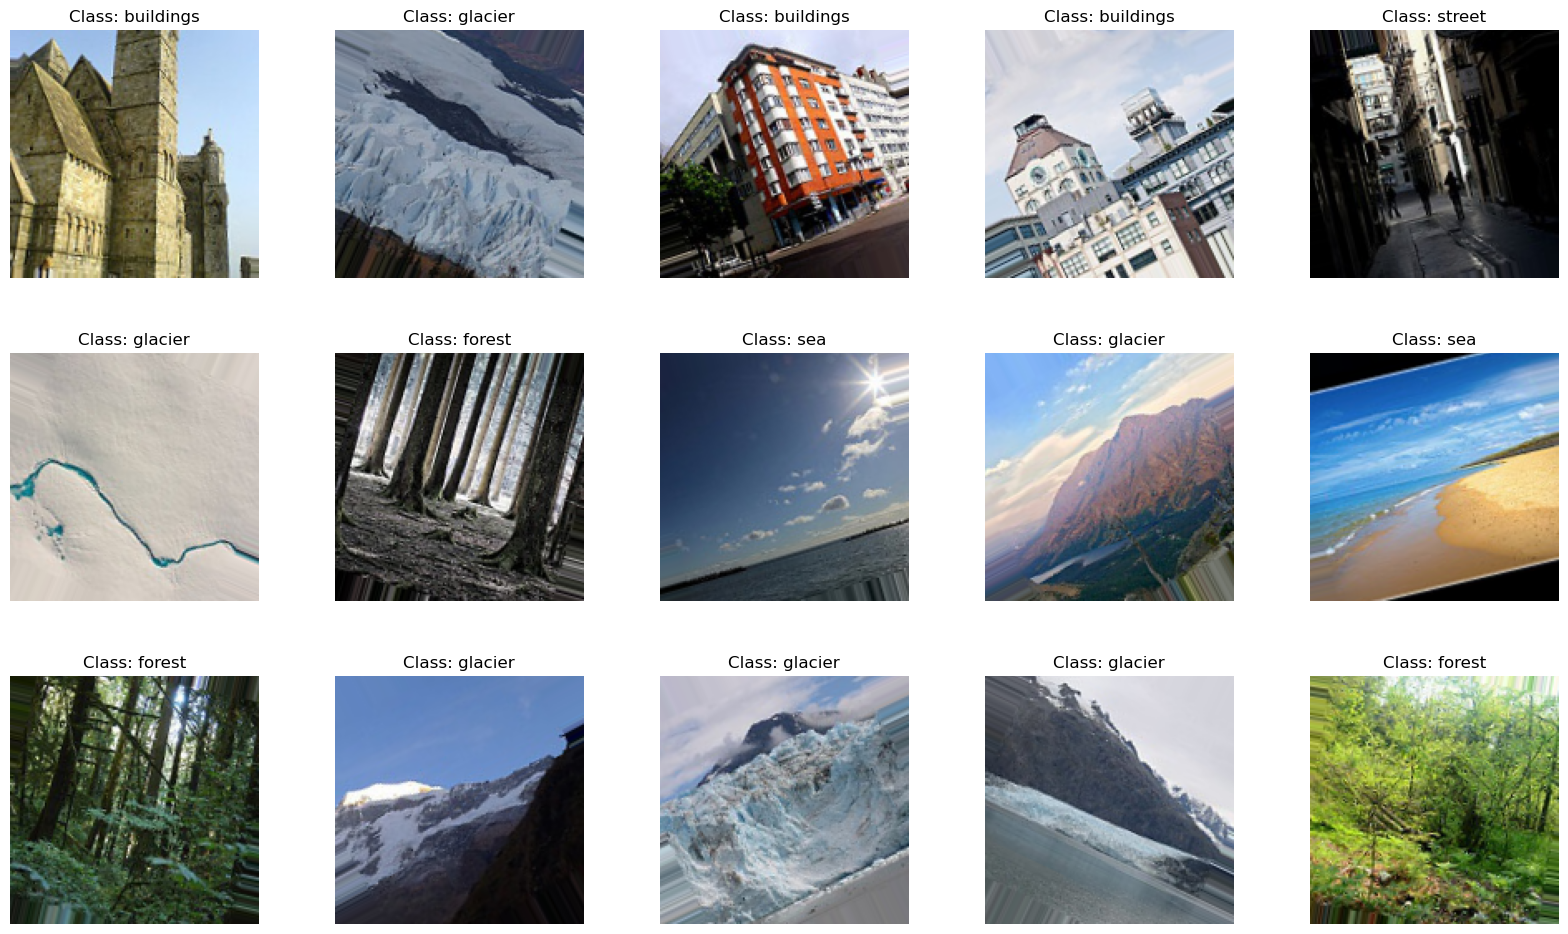

In [11]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


samples = train_generator.__next__() 
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

## Building the Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2023-03-01 14:40:23.170755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

## Training the Model

In [14]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10) 

Epoch 1/10
439/439 [==============================] - 163s 371ms/step - loss: 1.0782 - accuracy: 0.5730 - val_loss: 0.8186 - val_accuracy: 0.6840
Epoch 2/10
439/439 [==============================] - 163s 372ms/step - loss: 0.8043 - accuracy: 0.7014 - val_loss: 0.6993 - val_accuracy: 0.7517
Epoch 3/10
439/439 [==============================] - 160s 364ms/step - loss: 0.6862 - accuracy: 0.7526 - val_loss: 0.6081 - val_accuracy: 0.7860
Epoch 4/10
439/439 [==============================] - 222s 506ms/step - loss: 0.6081 - accuracy: 0.7815 - val_loss: 0.5363 - val_accuracy: 0.8063
Epoch 5/10
439/439 [==============================] - 161s 366ms/step - loss: 0.5656 - accuracy: 0.7996 - val_loss: 0.5343 - val_accuracy: 0.8103
Epoch 6/10
439/439 [==============================] - 162s 368ms/step - loss: 0.5126 - accuracy: 0.8175 - val_loss: 0.4752 - val_accuracy: 0.8360
Epoch 7/10
439/439 [==============================] - 160s 365ms/step - loss: 0.4825 - accuracy: 0.8270 - val_loss: 0.4778 -

## Visualize the training and valiadtion Loss

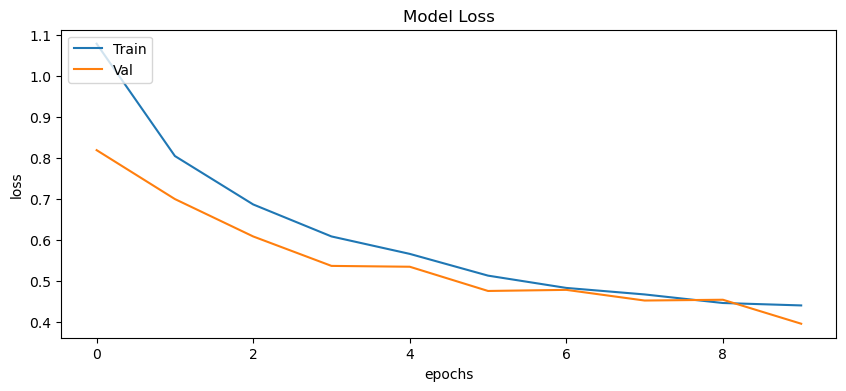

In [15]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show() 

## Visualize the Accuracy

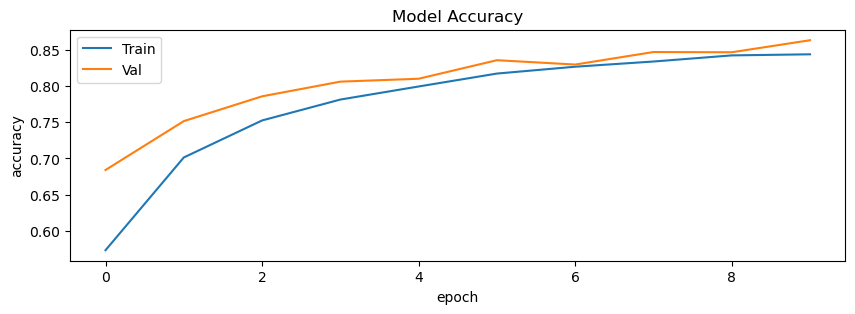

In [16]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Model Evaluation

Make Prediction on the test dataset

In [17]:
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

94/94 [==============================] - 10s 103ms/step
Predicted classes: [0 0 0 ... 4 0 5]
True labels: [0 0 0 ... 5 5 5]


Evaluate the performance of the model

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))

Accuracy:
 0.8636666666666667
